<img src="images/DLI_Header.png" style="width: 400px;">

# MNIST 데이터세트로 이미지 분류

이 섹션에서는 딥러닝의 "Hello World"를 수행하여 수기 문자를 올바르게 분류하도록 딥러닝 모델을 트레이닝해보겠습니다.

## 목표

* 딥러닝이 기존의 프로그래밍 메서드로는 불가능했던 문제를 어떻게 해결할 수 있는지 이해
* [MNSIT 수기 문자 데이터세트](http://yann.lecun.com/exdb/mnist/)에 대해 알아보기
* [Keras API](https://keras.io/)를 사용하여 MNIST 데이터세트를 로드하고 트레이닝을 위해 준비
* 단순한 뉴럴 네트워크를 구축하여 이미지 분류 수행
* 준비된 MNIST 데이터세트를 사용하여 뉴럴 네트워크 트레이닝
* 트레이닝된 뉴럴 네트워크의 성능 관찰

## 문제: 이미지 분류

기존 프로그래밍에서는 프로그래머가 코드에 규칙과 조건을 설명할 수 있으며, 프로그램은 이를 사용하여 올바른 방식으로 동작할 수 있습니다. 이 접근 방식은 매우 다양한 문제에 대해 계속해서 뛰어난 효과를 보여줍니다.

처음 접한 이미지를 정확한 클래스로 올바르게 분류하도록 프로그램에 요청하는 이미지 분류는 기존 프로그래밍 기술로는 해결하기가 거의 불가능합니다. 특히 처음 접하는 이미지를 고려할 때 어떻게 해서 프로그래머가 매우 다양한 이미지를 올바르게 분류하기 위한 규칙과 조건을 정의할 수 있을까요?

## 솔루션: 딥러닝

딥러닝은 시행착오를 통한 패턴 인식에 뛰어난 면모를 보입니다. 충분한 데이터로 딥 뉴럴 네트워크를 트레이닝하고 트레이닝을 통해 성능에 대한 피드백을 네트워크에 제공함으로써 네트워크는 엄청난 수의 반복이 요구되기는 하지만 그래도 올바른 방식으로 작동할 수 있는 기준이 되는 나름의 조건을 식별할 수 있습니다.

## MNIST 데이터세트

딥러닝의 역사에서, 0~9의 수기 문자로 구성된 70,000개의 회색조 이미지가 모여 있는 [MNSIT 데이터세트](http://yann.lecun.com/exdb/mnist/)의 정확한 이미지 분류는 엄청난 발전이었습니다. 오늘날에는 문제가 사소하게 여겨지고 있지만 MNIST를 사용한 이미지 분류 수행은 딥러닝의 "Hello World"와 같은 것이 되었습니다.

다음은 MNIST 데이터세트에 포함된 이미지 중 40개입니다.

<img src="images/mnist1.png" style="width: 600px;">

## 트레이닝 및 검증 데이터 및 레이블

딥러닝을 위해 이미지로 작업할 때에는 이미지 자체(대개 `X`로 표시됨)뿐 아니라 이러한 이미지의 올바른 [레이블](https://developers.google.com/machine-learning/glossary#label)(대개 `Y`로 표시됨)가 모두 필요합니다. 아울러, 모델 *트레이닝*을 위한 `X` 및 `Y` 값이 둘 다 필요하며, 트레이닝된 이후의 모델 성능 *검증*을 위한 별도의 `X` 및 `Y` 값이 필요합니다. 따라서 MNIST 데이터세트에는 다음 4개의 데이터 세그먼트가 필요합니다.

1. `x_train`: 뉴럴 네트워크를 트레이닝하는 데 사용되는 이미지
2. `y_train`: `x_train` 트레이닝 중 모델의 예측을 평가하는 데 사용되는 올바른 이미지 레이블
3. `x_valid`: 트레이닝된 모델의 성능 검증을 위해 따로 확보해 놓는 이미지
4. `y_valid`: `x_valid` 트레이닝 후 모델의 예측을 평가하는 데 사용되는 올바른 이미지 레이블

분석을 위한 데이터 준비 과정을 [데이터 엔지니어링](https://medium.com/@rchang/a-beginners-guide-to-data-engineering-part-i-4227c5c457d7)이라고 부릅니다. 트레이닝 데이터와 검증 데이터(및 테스트 데이터) 간의 차이점에 대해 자세히 알아보려면 Jason Browlee가 작성한 [이 문서](https://machinelearningmastery.com/difference-test-validation-datasets/)를 참조하십시오.

## 데이터를 메모리에 로드(Keras 사용)

다수의 [딥러닝 프레임워크](https://developer.nvidia.com/deep-learning-frameworks)가 존재하며, 각자 나름의 장점을 지니고 있습니다. 이 워크숍에서는 [Tensorflow 2](https://www.tensorflow.org/tutorials/quickstart/beginner), 구체적으로는 [Keras API](https://keras.io/)를 사용할 것입니다. Keras에는 컴퓨터 비전 작업을 위해 고안된 다수의 유용한 기능이 내장되어 있습니다. [가독성](https://blog.pragmaticengineer.com/readable-code/) 및 효율성 덕분에 전문가적 환경에서 딥러닝을 위한 타당한 선택이기도 합니다. 하지만 Keras만 그런 것이 아니므로 딥러닝 프로젝트를 시작할 때는 다양한 프레임워크를 살펴볼 가치가 있습니다.

Keras가 제공하는 여러 유용한 기능 중 하나는 MNIST를 비롯한 [여러 공통 데이터 세트](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)를 위한 다수의 헬퍼 메서드를 포함하는 모듈입니다.

먼저 MNIST를 위한 Keras 데이터세트를 로드해 보겠습니다.

In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np

`mnist` 모듈의 경우 트레이닝 및 검증을 위해 이미지와 레이블로 미리 분할되어 있는 MNIST 데이터를 쉽게 로드할 수 있습니다.

In [41]:
# the data, split between train and validation sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## MNIST 데이터 살펴보기

앞서 언급했던 것처럼 MNIST 데이터세트에는 수기 문자로 이루어진 70,000개의 회색조 이미지가 포함되어 있습니다. 다음 셀을 실행하면 Keras가 트레이닝을 위해 60,000개의 이미지, 검증(트레이닝 후)을 위해 10,000개의 이미지를 분할했으며 각 이미지 자체가 28x28 차원의 2D 어레이임을 확인할 수 있습니다.

In [10]:
x_train.shape

(60000, 28, 28)

In [42]:
x_test.shape

(10000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [43]:
y_test.shape

(10000,)

In [6]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

뿐만 아니라, 이러한 28x28 이미지가 0~255의 서명되지 않은 8비트 정수 값 모음으로 표현되는 것을 확인할 수 있습니다. 이는 픽셀의 회색조 값에 해당하는 값들로, `0`은 검은색, `255`는 흰색, 그리고 나머지 모든 값은 둘 사이의 값에 해당합니다.

In [14]:
x_train.dtype

dtype('uint8')

In [266]:
x_train.min()

0

In [267]:
x_train.max()

255

In [15]:
x_train[0].shape

(28, 28)

[Matplotlib](https://matplotlib.org/)를 사용하면 데이터세트에서 이러한 회색조 이미지 중 하나를 렌더링할 수 있습니다.

5


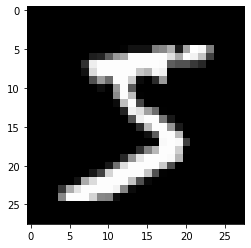

In [7]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

print(y_train[0])

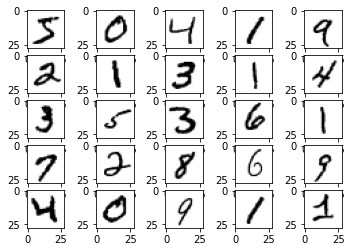

In [8]:
fig, axs = plt.subplots(5,5)
for i in range(5):
  for j in range(5):
    axs[i, j].imshow(x_train[i*5+j], cmap='gray_r')
plt.show()

이렇게 하면 이것이 5의 28x28 픽셀 이미지임을 알 수 있습니다. 아니면 3일까요? 답은 데이터의 올바른 레이블을 포함하는 `y_train` 데이터에 있습니다. 한번 살펴보겠습니다.

In [17]:
y_train[0]
y_train[0:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

## 트레이닝을 위한 데이터 준비

### 이미지 데이터 평탄화

딥러닝에서는 대부분의 경우 트레이닝을 위한 적합한 상태로 데이터를 변환해야 합니다. 이러한 특정 이미지 분류 문제의 경우, 트레이닝을 준비하는 과정에서 데이터에 3가지 작업을 수행해야 합니다.
1. 이미지 데이터를 평탄화하여 모델에 입력되는 이미지를 간소화해야 합니다.
2. 이미지 데이터를 정규화하여 이미지 입력 값이 모델에서 더 쉽게 작동되도록 해야 합니다.
3. 레이블을 분류하여 레이블 값이 모델에서 더 쉽게 작동되도록 해야 합니다.

딥러닝 모델에서 2차원 이미지(우리 경우에는 28x28픽셀)를 사용할 수도 있긴 하지만 여기서는 간단하게 각 이미지를 784개의 연속 픽셀(참고: 28x28 = 784)로 이루어진 단일 어레이로 [재구성(reshape)](https://www.tensorflow.org/api_docs/python/tf/reshape)하겠습니다. 이는 이미지 평탄화라고도 불립니다.

여기서는 헬퍼 메서드 `reshape`를 사용하여 이를 수행합니다.

In [44]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

이미지가 재구성되어 각 784개의 픽셀 값을 포함하는 1D 어레이의 모음이 되었음을 확인할 수 있습니다.

In [45]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### 이미지 데이터 정규화

딥러닝 모델은 0에서 1 사이의 부동 소수점 수를 처리하는 데 더 뛰어납니다(이 주제에 대해서는 나중에 자세히 다루겠습니다). 정수 값을 0에서 1 사이의 부동 소수점 값으로 변환하는 것을 [정규화](https://developers.google.com/machine-learning/glossary#normalization)라고 하며, 여기서는 데이터를 정규화하기 위해 모든 픽셀 값(앞에서 언급했던 것처럼 0~255)을 255로 나누는 단순한 접근 방법을 사용하겠습니다.

In [46]:
x_train = x_train / 255
x_test = x_test / 255 

이제 값이 모두 `0.0`~`1.0`의 부동 소수점 값으로 변환되었음을 확인할 수 있습니다.

In [13]:
x_train.min()

0.0

In [14]:
x_train.max()

1.0

### 범주 인코딩

7 - 2의 답이 뭐냐고 묻는 질문을 받는다고 가정해 보겠습니다. 4라고 답하는 것은 9라고 답하는 것보다 훨씬 정답에 근접합니다. 하지만 이러한 이미지 분류 문제의 경우 뉴럴 네트워크가 이런 종류의 추론을 배우지 않도록 하는 것이 좋습니다. 그냥 올바른 범주를 선택하고 숫자 5의 이미지가 있는 경우 4를 추측하는 것이 9를 추측하는 것 만큼이나 나쁘다는 점을 이해하도록 해야 합니다.

이미지의 레이블은 현재 상태 그대로 0~9의 정수입니다. 이러한 값이 숫자 범위를 나타내므로, 모델은 올바른 숫자 범주에 얼마나 근접하게 추측하는지에 따라 성능에 대한 어떤 결론을 내리려 할 수도 있습니다.

따라서 여기서는 데이터에 범주 인코딩이라는 작업을 수행하겠습니다. 이러한 변환은 이 특정 값이 true로 설정된 실제 범주를 포함해 각 값이 가능한 모든 범주의 모음이 되도록 데이터를 수정합니다.

간단히 예를 들면, 빨간색, 파란색, 초록색, 이렇게 3개의 범주가 있다고 가정해 보겠습니다. 주어진 색상에 대해 이러한 범주 중 둘은 false, 나머지 하나는 true가 될 것입니다.

|Actual Color| Is Red? | Is Blue? | Is Green?|
|------------|---------|----------|----------|
|Red|True|False|False|
|Green|False|False|True|
|Blue|False|True|False|
|Green|False|False|True|

"True" 또는 "False"를 사용하는 대신 0 또는 1의 바이너리를 사용하여 같은 내용을 표현할 수 있습니다.

|Actual Color| Is Red? | Is Blue? | Is Green?|
|------------|---------|----------|----------|
|Red|1|0|0|
|Green|0|0|1|
|Blue|0|1|0|
|Green|0|0|1|

이것이 범주 인코딩 즉, 범주 레이블로 이해되어야 하는 값을 모델이 범주 특성을 알 수 있는 표현으로 변환하는 것입니다. 따라서 다음의 값을 트레이닝에 사용할 경우

```python
values = ['red, green, blue, green']
```

... 뉴럴 네트워크가 이를 이해하기는 매우 어렵기에 다음과 같이 변환합니다.

```python
values = [
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 1]
]
```

### 레이블 범주 인코딩

Keras는 [값을 범주 인코딩](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)하는 유틸리티를 제공하며, 여기서는 이를 사용하여 트레이닝 및 검증 레이블 모두에 대한 범주 인코딩을 수행합니다.

In [47]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

다음은 트레이닝 레이블과 관련된 첫 번째 10개 값으로, 지금은 범주 인코딩이 되어 있는 것을 확인할 수 있습니다.

In [48]:
print(y_train[0:9])
print(y_test[0])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## 모델 생성

트레이닝을 위한 데이터가 준비되었으니 이제 데이터로 트레이닝할 모델을 생성해야 합니다. 이 첫 번째 기본 모델은 여러 개의 *레이어*로 이루어지며 3가지 주요 부분으로 구성됩니다.

1. 어느 정도 예상되는 형식으로 데이터를 수신하는 입력 레이어
2. 각각 다수의 *뉴런*으로 구성된 여러 개의 [숨겨진 레이어](https://developers.google.com/machine-learning/glossary#hidden-layer) 각 [뉴런](https://developers.google.com/machine-learning/glossary#neuron)은 *가중치*로 네트워크의 추측에 영향을 미칠 수 있으며, 가중치는 네트워크가 수많은 반복을 통해 성능에 대한 피드백을 수신하고 학습하면서 업데이트하게 되는 값입니다.
3. 주어진 이미지에 대한 네트워크의 추측을 보여주는 출력 레이어

### 모델 인스턴스화

우선 Keras의 [순차](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) 모델 클래스를 사용하여 데이터가 연속으로 통과할 일련의 레이어를 보유한 모델의 인스턴스를 인스턴스화하겠습니다.

In [49]:
from tensorflow.keras.models import Sequential

model = Sequential()

### 입력 레이어 생성

다음으로, 입력 레이어를 추가합니다. 이 레이어는 *밀집 연결*되어 있습니다. 따라서 포함된 각 뉴런과 가중치가 다음 레이어의 모든 뉴런에 영향을 줍니다. Keras로 이를 수행하려면 Keras의 [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 레이어 클래스를 사용해야 합니다.

In [50]:
from tensorflow.keras.layers import Dense


`units` 인수는 레이어 내 뉴런 수를 지정합니다. 여기서는 실험에서 선택한 `512`를 사용하겠습니다. 올바른 뉴런 수를 선택하는 것은 데이터세트의 통계적 복잡성을 없애주는 일이므로, "데이터 사이언스" 작업의 핵심이라 할 수 있습니다. 나중에 이 값을 시험해보며 트레이닝에 어떤 영향을 미치는지 살펴보고 이 숫자의 의미에 대한 감을 키우시기 바랍니다.

활성화 함수에 대해서는 나중에 자세히 알아보겠지만 일단은 `relu` 활성화 함수를 사용하겠습니다. 간략하게 설명하자면, 이 함수는 네트워크가 일부 엄격한 선형 함수를 토대로 추측해야 하는 경우에 비해 데이터에 대한 좀 더 정교한 추측을 하는 방법을 배울 수 있게 도와줍니다.

`input_shape` 값은 수신되는 데이터의 모양을 지정하며, 여기서는 784개 값으로 이루어진 1D 어레이입니다.

In [51]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

### 숨겨진 레이어 생성

이제 밀집 연결된 추가 레이어를 더해 보겠습니다. 마찬가지로, 이와 관련된 내용도 나중에 자세히 알아보겠지만, 지금은 이러한 레이어가 추측에 기여하는 더 많은 매개변수 즉, 정확한 학습을 위한 좀 더 예리한 기회를 네트워크에 제공한다는 사실을 알면 됩니다.

In [52]:
model.add(Dense(units = 512, activation='relu'))

### 출력 레이어 생성

마지막으로, 출력 레이어를 추가하겠습니다. 이 레이어는 각 레이어의 값이 0에서 1사이의 확률이 되도록 하고 레이어의 모든 출력이 1에 추가되도록 하는 활성 함수인 `softmax`를 사용합니다. 이 경우에는 네트워크가 1에서 10까지의 가능한 범주에 속하는 단일 이미지에 대해 추측을 수행하므로 출력은 10개가 됩니다. 각 출력은 이미지가 해당 특정 클래스에 속한다는 모델의 추측(확률)을 제공합니다.

In [53]:
model.add(Dense(units = 10, activation='softmax'))

### 모델 요약

Keras는 모델에 대한 읽을 수 있는 요약을 출력하는 모델 인스턴스 메서드 [요약](https://www.tensorflow.org/api_docs/python/tf/summary)을 제공합니다.

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


트레이닝 가능한 매개변수의 수를 확인하십시오. 이러한 각 매개변수는 트레이닝 도중에 조정 가능하며 트레이닝된 모델의 추측에 기여합니다.

### 모델 컴파일

마찬가지로 좀 더 상세한 내용이 따르겠지만 실제로 데이터를 사용하여 모델을 트레이닝하기 전에 수행해야 할 마지막 단계는 모델을 [컴파일](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile)하는 것입니다. 여기서는 트레이닝 중 모델에서 성능을 파악하는 데 사용되는 [손실 함수](https://developers.google.com/machine-learning/glossary#loss)를 지정합니다. 또한 모델 트레이닝 동안 `accuracy`도 추적하도록 지정합니다.

In [55]:
hist = model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 모델 트레이닝

트레이닝 및 검증 데이터와 모델이 준비되었으니 이제 트레이닝 데이터로 모델을 트레이닝하고 검증 데이터로 이를 검증해야 합니다.

\"데이터로 모델을 트레이닝\"하는 것을 흔히 \"모델을 데이터에 맞춘다\"라고도 합니다. 모델을 데이터에 맞춘다는 말은 주어지고 있는 데이터를 좀 더 정확하게 이해하기 위해 모델이 점차적으로 모양을 바꾼다는 점을 부각시킵니다.

Keras로 모델을 맞추는(트레이닝하는) 경우에는 모델의 [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) 메서드를 사용합니다. 그러면 다음 인수를 예상합니다.

* 트레이닝 데이터
* 트레이닝 데이터의 레이블
* 전체 트레이닝 데이터세트에 대해 트레이닝해야 하는 횟수(*에포크*)
* 검증 또는 테스트 데이터 및 해당 레이블

아래 셀을 실행하여 모델을 트레이닝하십시오. 출력에 대해서는 트레이닝이 완료된 후에 논의하겠습니다.

In [56]:
history = model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_split=0.2
)

# history = model.fit(
#     x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid)
# )

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3369 - accuracy: 0.8985 - val_loss: 0.1451 - val_accuracy: 0.9544
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0837 - accuracy: 0.9733 - val_loss: 0.0964 - val_accuracy: 0.9708
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0571 - accuracy: 0.9810 - val_loss: 0.1005 - val_accuracy: 0.9727
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0419 - accuracy: 0.9864 - val_loss: 0.1001 - val_accuracy: 0.9726
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0318 - accuracy: 0.9894 - val_loss: 0.0877 - val_accuracy: 0.9764
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0872 - val_accuracy: 0.9783
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.1232 - val_accuracy:

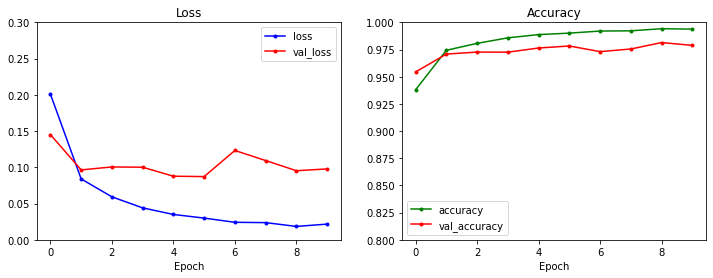

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], marker='.', c='blue', label='loss')
plt.plot(history.history['val_loss'], marker='.',c='red', label='val_loss')
plt.xlabel('Epoch')
plt.ylim(0.0,0.3)
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], marker='.', c='green', label='accuracy')
plt.plot(history.history['val_accuracy'], marker='.', c='red', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.8, 1.0)
plt.legend()

plt.show()

In [58]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0970 - accuracy: 0.9793


[0.09695601463317871, 0.9793000221252441]

### 정확도 관찰

5회의 에포크 각각에 대해 `accuracy` 및 `val_accuracy` 점수를 살펴보십시오. `accuracy`는 모든 트레이닝 데이터에 대한 에포크 동안의 모델 성능이 어땠는지를 명시합니다. `val_accuracy`는 모델을 트레이닝하는 데 전혀 사용되지 않는 검증 데이터에 대한 모델 성능이 어땠는지를 나타냅니다.

# 예측(Prediction)

모델이 꽤 뛰어난 성능을 보여줬습니다! 정확도는 거의 100%에 빠르게 도달했고, 이는 검증 정확도의 경우에도 비슷했습니다. 이제 수기 이미지를 정확하게 검출하고 분류하는 데 사용할 수 있는 모델이 준비되었습니다.

다음 단계는 이 모델을 사용하여 처음 접하는 새로운 수기 이미지를 분류하는 것입니다. 이를 [추론](https://blogs.nvidia.com/blog/2016/08/22/difference-deep-learning-training-inference-ai/)이라고 부릅니다. 추론 과정은 이후 연습에서 살펴보겠습니다. 

(10000, 28, 28)


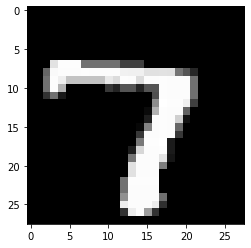

[[4.3019781e-32 4.9624770e-24 1.2901939e-20 6.8811321e-23 1.1438944e-28
  1.0016592e-33 5.4895740e-37 1.0000000e+00 2.3193394e-29 9.9595833e-21]] 7
Actual : 7	Predict : 7


In [60]:
import random
import numpy as np

index =random.randint(0,9999)

img = x_test.reshape((10000,28,28))
print(img.shape)

plt.imshow(img[index], 'gray')
plt.show()

predict = model.predict(x_test[index:index+1])
print(predict, np.argmax(predict))
print("Actual : {}\tPredict : {}".format(np.argmax(y_test[index]),np.argmax(predict)),)

plt.show()




## 요약

우리가 여기서 수행한 내용을 잠시 평가해 볼 가치가 있습니다. 예전에는 이러한 작업을 수행하도록 구축된 전문가 시스템이 매우 복잡했으며, 사람들은 이를 구축하느라 경력을 소비했습니다([공식 MNIST 페이지](http://yann.lecun.com/exdb/mnist/)의 참조 자료와 주요 시점에 도달한 연도 참조).

MNIST는 컴퓨터 비전에 대한 기존의 영향 요인에 유용할 뿐만 아니라 뛰어난 [벤치마크](http://www.cs.toronto.edu/~serailhydra/publications/tbd-iiswc18.pdf)이자 디버깅 툴이기도 합니다. 새로운 근사한 머신 러닝 아키텍처를 작동하는 데 어려움을 겪고 계십니까? MNIST와 비교해 보십시오. 이 데이터세트에 대해 학습할 수 없다면 더 복잡한 이미지와 데이터세트에 대해 학습할 수 없을 가능성이 높습니다.

## 메모리 지우기

넘어가기 전에 다음 셀을 실행하여 GPU 메모리를 지워주시기 바랍니다. 이는 다음 노트북으로 넘어가기 위한 필수 작업입니다.

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## 다음

이 섹션에서는 이미지 분류를 위한 단순한 뉴럴 네트워크를 구축하고 트레이닝하는 방법을 알아보았습니다. 다음 섹션에서는 직접 뉴럴 네트워크를 구축하고 데이터 준비를 수행하여 여러 이미지 분류 문제를 해결해야 합니다.

이어서 [02_asl.ipynb](02_asl.ipynb)를 진행해 주시기 바랍니다.

## ☆ 추가 연습 ☆

시간적 여유가 있으십니까? 다음 섹션에서는 위의 수치 중 일부에 어떻게 도달했는지에 대해 이야기하겠지만, 오늘날 자주 사용되는 기술을 개발하는 연구원이 된 느낌이 어떤 것인지를 상상해볼 수 있습니다.

궁극적으로 각 뉴런은 행을 어떤 데이터에 맞추려고 시도합니다. 아래에는 몇몇 데이터포인트, 그리고 등식 [y = mx + b](https://www.mathsisfun.com/equation_of_line.html)을 사용하여 임의로 도출된 행이 있습니다.

`m` 및 `b`를 변경하여 최대한 낮은 손실을 찾아보십시오. 가장 적합한 행을 어떻게 찾았습니까? 프로그램이 여러분의 전략을 따르도록 만들 수 있습니까?

y_hat :  [40 38 36 34 32 30 28 26 24 22]


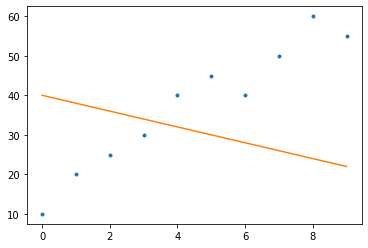

Loss: 475.5


In [19]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

w = -2  # -2 to start, change me please
b = 40 # 40 to start, change me please

# Sample data
# y is actual value : label
# y_hat is prediction : Hypothesis
x = np.array([0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])

y_hat = x * w + b
print('y_hat : ', y_hat)

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

print("Loss:", np.sum((y - y_hat)**2)/len(x))

In [20]:
# w = 0
# b = 0
lr = 0.03
epochs = 101

loss =  475.5
loss =  354.36929999999995
epoch=1, 기울기=-0.5741, 절편=39.3310, w편미분=128.4700, b편미분=35.3000
w =  -0.5740999999999996


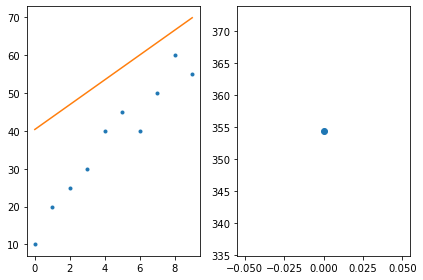

loss =  283.04675518499994
epoch=2, 기울기=2.4482, 절편=39.3761, w편미분=-100.7447, b편미분=-1.5049
w =  2.448240999999999


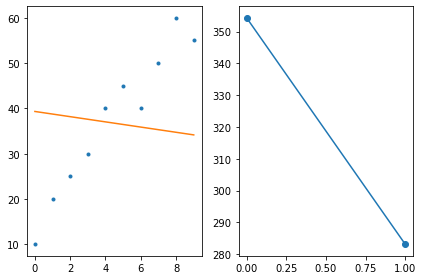

loss =  240.05859696376052
epoch=3, 기울기=0.2902, 절편=38.6026, w편미분=71.9351, b편미분=25.7865
w =  0.2901891999999999


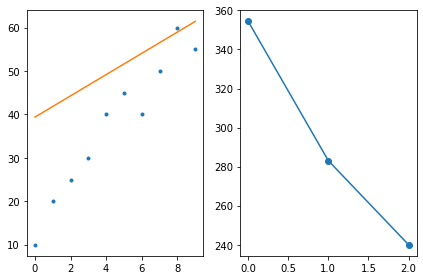

loss =  213.22415550111063
epoch=4, 기울기=2.0313, 절편=38.4580, w편미분=-58.0362, b편미분=4.8168
w =  2.031276328299999


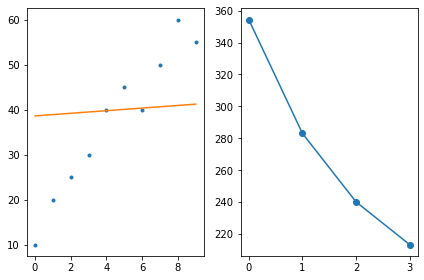

loss =  195.63294557127222
epoch=5, 기울기=0.8341, 절편=37.8521, w편미분=39.9052, b편미분=20.1976
w =  0.8341206202690008


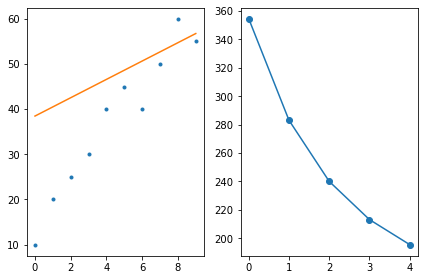

loss =  183.36328219592127
epoch=6, 기울기=1.8477, 절편=37.6058, w편미분=-33.7860, b편미분=8.2113
w =  1.84770160850236


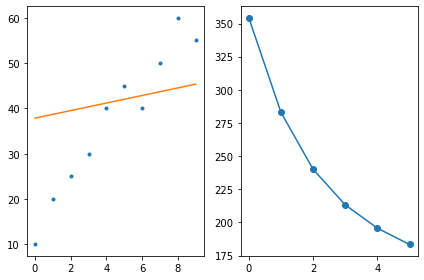

loss =  174.1885120478179
epoch=7, 기울기=1.1946, 절편=37.1006, w편미분=21.7710, b편미분=16.8409
w =  1.1945708651406841


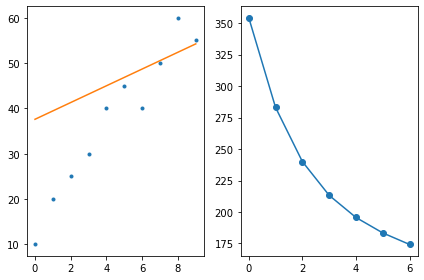

loss =  166.84331852485184
epoch=8, 기울기=1.7947, 절편=36.8020, w편미분=-20.0045, b편미분=9.9522
w =  1.794704799756655


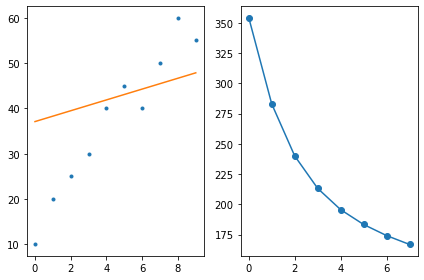

loss =  160.60764281415987
epoch=9, 기울기=1.4492, 절편=36.3593, w편미분=11.5161, b편미분=14.7563
w =  1.4492229154076801


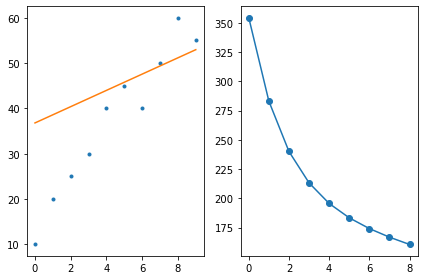

loss =  155.07072401198158
epoch=10, 기울기=1.8140, 절편=36.0365, w편미분=-12.1606, b편미분=10.7616
w =  1.814041233803619


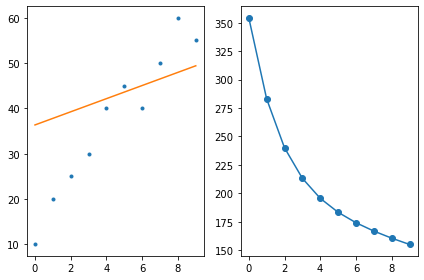

loss =  149.99728424924254
epoch=11, 기울기=1.6422, 절편=35.6345, w편미분=5.7284, b편미분=13.3993
w =  1.6421892080511373


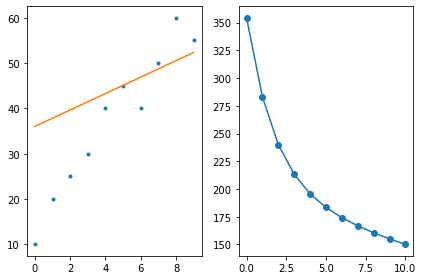

loss =  145.2516399994258
epoch=12, 기울기=1.8727, 절편=35.3030, w편미분=-7.6850, b편미분=11.0486
w =  1.8727382432365798


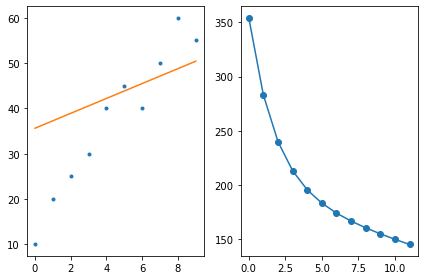

loss =  140.754663220272
epoch=13, 기울기=1.7985, 절편=34.9292, w편미분=2.4732, b편미분=12.4607
w =  1.7985424666646712


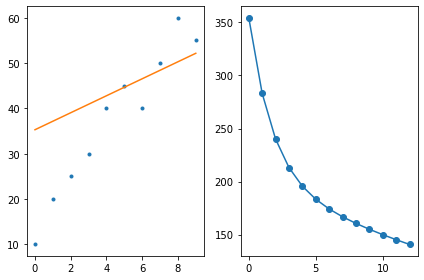

loss =  136.4593716137942
epoch=14, 기울기=1.9522, 절편=34.5978, w편미분=-5.1203, b편미분=11.0453
w =  1.9521528888009132


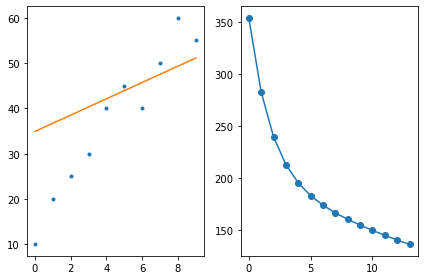

loss =  132.33708348194295
epoch=15, 기울기=1.9326, 절편=34.2449, w편미분=0.6532, b편미분=11.7650
w =  1.9325561524960675


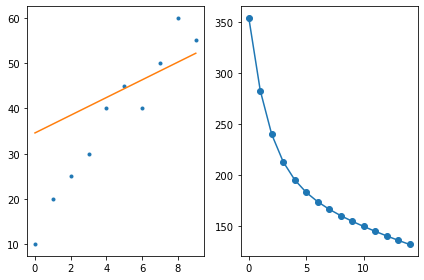

loss =  128.36956381150588
epoch=16, 기울기=2.0418, 절편=33.9184, w편미분=-3.6404, b편미분=10.8828
w =  2.0417666986534106


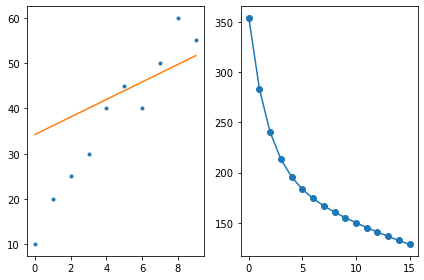

loss =  124.54456804482882
epoch=17, 기울기=2.0524, 절편=33.5820, w편미분=-0.3537, b편미분=11.2127
w =  2.0523776603831227


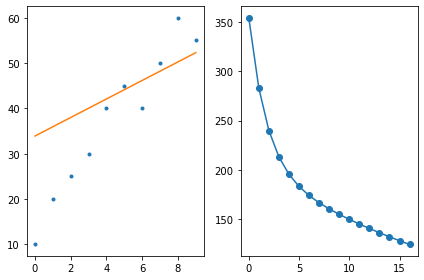

loss =  120.85331274397132
epoch=18, 기울기=2.1357, 절편=33.2630, w편미분=-2.7763, b편미분=10.6354
w =  2.1356667489012384


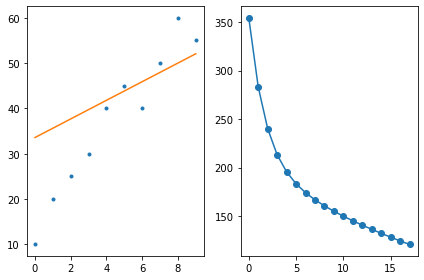

loss =  117.28903906430871
epoch=19, 기울기=2.1627, 절편=32.9405, w편미분=-0.9004, b편미분=10.7469
w =  2.1626785342289105


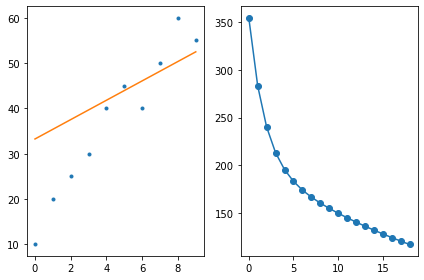

loss =  113.84619602886225
loss =  110.51997535928676
epoch=21, 기울기=2.2662, 절편=32.3201, w편미분=-1.1869, b편미분=10.3353
w =  2.266157455019037


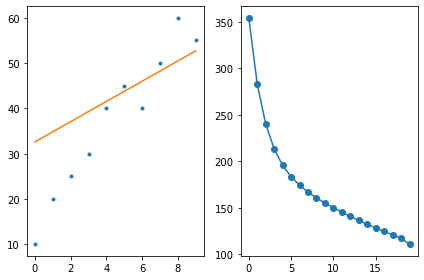

loss =  107.30604574086685
epoch=22, 기울기=2.3246, 절편=32.0191, w편미분=-1.9478, b편미분=10.0357
w =  2.324592495943837


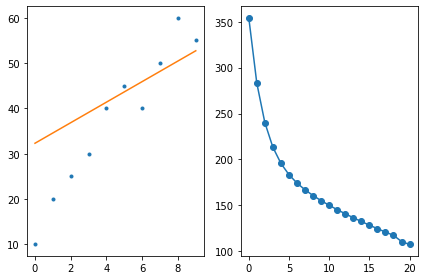

loss =  104.20040025101655
epoch=23, 기울기=2.3644, 절편=31.7203, w편미분=-1.3267, b편미분=9.9595
w =  2.364392638017676


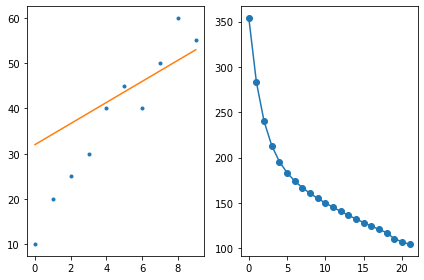

loss =  101.19926802538214
epoch=24, 기울기=2.4168, 절편=31.4287, w편미분=-1.7471, b편미분=9.7201
w =  2.4168061314912883


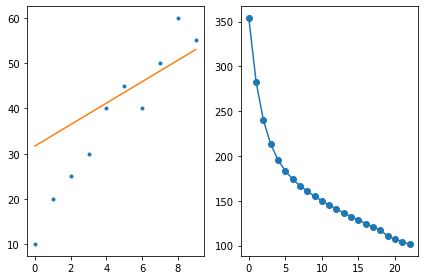

loss =  98.29906241371935
epoch=25, 기울기=2.4583, 절편=31.1404, w편미분=-1.3840, b편미분=9.6086
w =  2.458325280167481


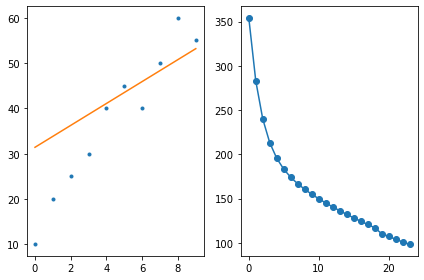

loss =  95.49634988780201
epoch=26, 기울기=2.5067, 절편=30.8582, w편미분=-1.6117, b편미분=9.4058
w =  2.5066763935815217


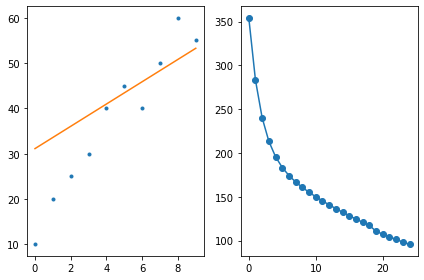

loss =  92.78783077456436
epoch=27, 기울기=2.5485, 절편=30.5799, w편미분=-1.3952, b편미분=9.2766
w =  2.5485337754317356


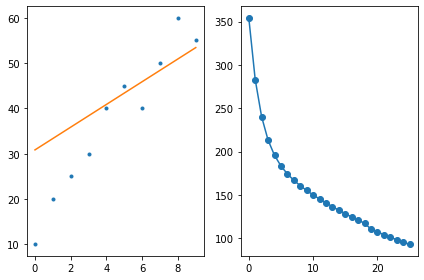

loss =  90.17032675021237
epoch=28, 기울기=2.5940, 절편=30.3070, w편미분=-1.5141, b편미분=9.0967
w =  2.593955302517699


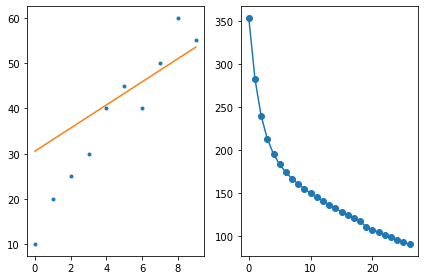

loss =  87.64077222153057
epoch=29, 기울기=2.6354, 절편=30.0383, w편미분=-1.3811, b편미분=8.9597
w =  2.6353892735311852


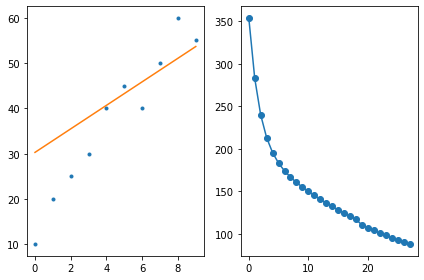

loss =  85.19620796289432
epoch=30, 기울기=2.6785, 절편=29.7744, w편미분=-1.4385, b편미분=8.7950
w =  2.678544643366026


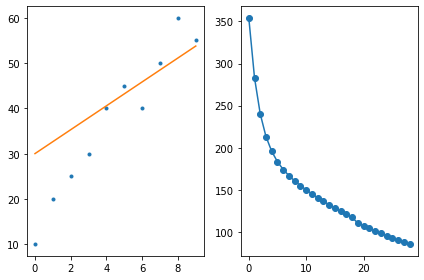

loss =  82.83377608205245
epoch=31, 기울기=2.7191, 절편=29.5147, w편미분=-1.3533, b편미분=8.6557
w =  2.719143947169322


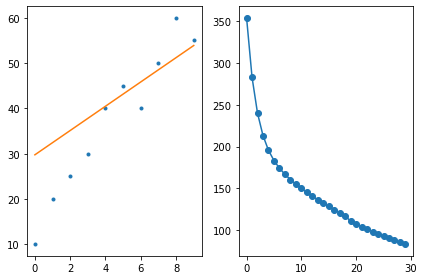

loss =  80.55071578735223
epoch=32, 기울기=2.7604, 절편=29.2597, w편미분=-1.3762, b편미분=8.5018
w =  2.7604297073328135


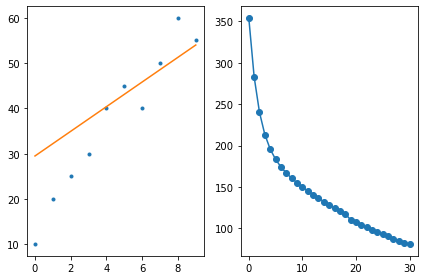

loss =  78.34435965575247
epoch=33, 기울기=2.8000, 절편=29.0088, w편미분=-1.3184, b편미분=8.3632
w =  2.7999810967759964


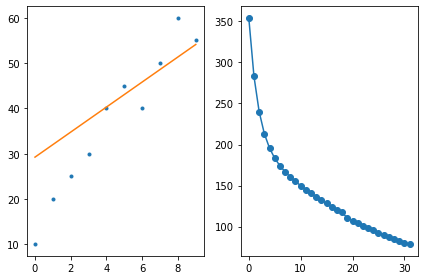

loss =  76.21213022956832
epoch=34, 기울기=2.8396, 절편=28.7623, w편미분=-1.3220, b편미분=8.2174
w =  2.8396417645969603


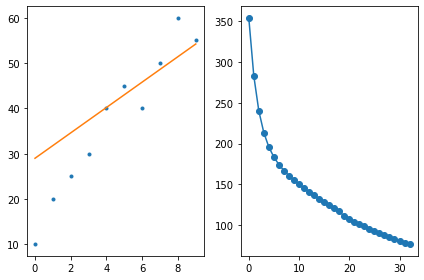

loss =  74.15153684287344
epoch=35, 기울기=2.8780, 절편=28.5198, w편미분=-1.2801, b편미분=8.0813
w =  2.878043611800571


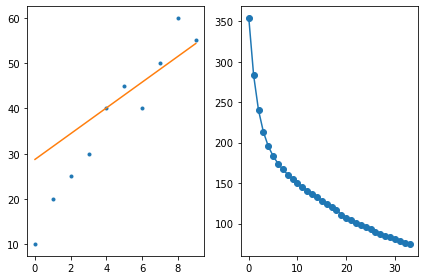

loss =  72.16017261992116
epoch=36, 기울기=2.9162, 절편=28.2816, w편미분=-1.2731, b편미분=7.9420
w =  2.9162368290452614


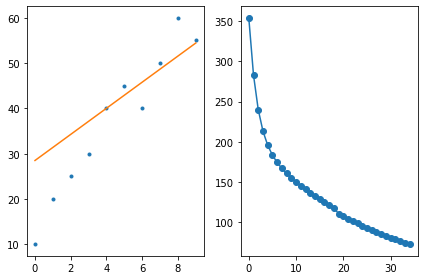

loss =  70.23571161149506
epoch=37, 기울기=2.9535, 절편=28.0473, w편미분=-1.2404, b편미분=7.8093
w =  2.9534501564963715


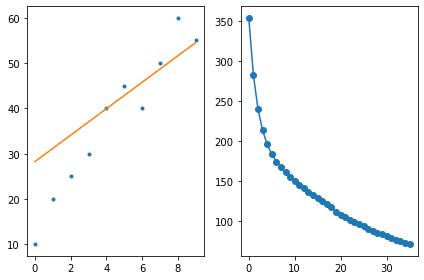

loss =  68.37590604850003
epoch=38, 기울기=2.9903, 절편=27.8170, w편미분=-1.2278, b편미분=7.6756
w =  2.9902836605363734


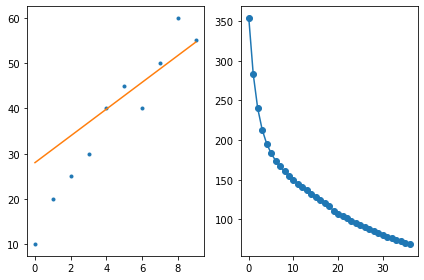

loss =  66.57858369975057
epoch=39, 기울기=3.0263, 절편=27.5906, w편미분=-1.2007, b편미분=7.5466
w =  3.0263043927776305


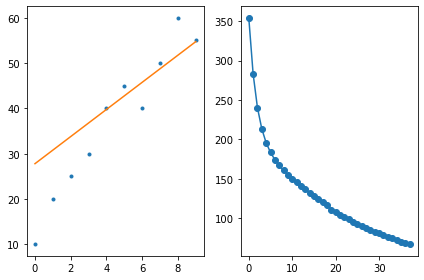

loss =  64.84164532529181
loss =  63.163062219116355
epoch=41, 기울기=3.0967, 절편=27.1493, w편미분=-1.1614, b편미분=7.2929
w =  3.096700252947085


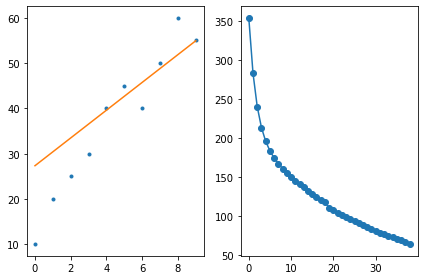

loss =  61.540873836612626
epoch=42, 기울기=3.1310, 절편=26.9342, w편미분=-1.1445, b편미분=7.1689
w =  3.131033798412209


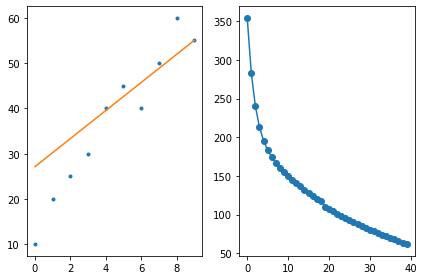

loss =  59.97318550295646
epoch=43, 기울기=3.1647, 절편=26.7228, w편미분=-1.1230, b편미분=7.0478
w =  3.1647249708915353


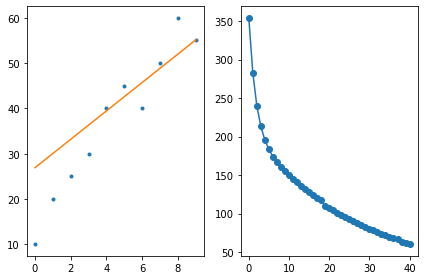

loss =  58.458166199192554
epoch=44, 기울기=3.1979, 절편=26.5150, w편미분=-1.1055, b편미분=6.9281
w =  3.1978910642696112


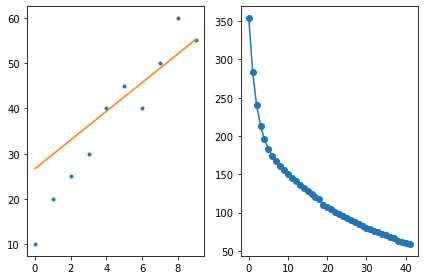

loss =  56.9940464230928
epoch=45, 기울기=3.2305, 절편=26.3106, w편미분=-1.0857, b편미분=6.8109
w =  3.2304608407330138


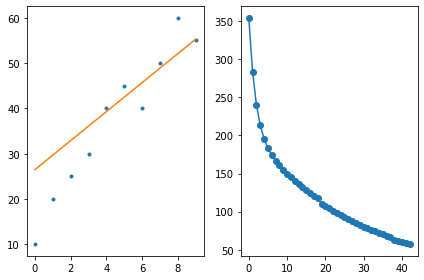

loss =  55.57911612210758
epoch=46, 기울기=3.2625, 절편=26.1098, w편미분=-1.0681, b편미분=6.6954
w =  3.262504748247387


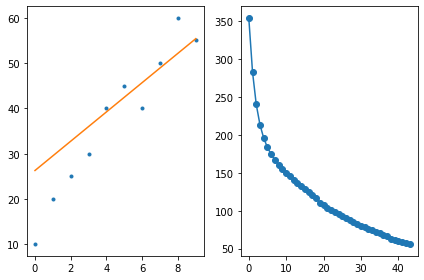

loss =  54.21172269589031
epoch=47, 기울기=3.2940, 절편=25.9123, w편미분=-1.0494, b편미분=6.5821
w =  3.2939862524915493


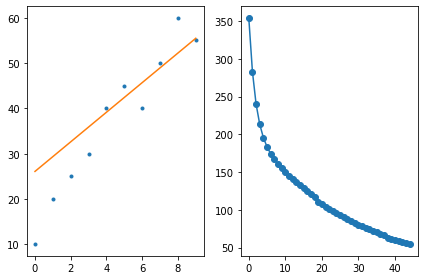

loss =  52.89026906600304
epoch=48, 기울기=3.3249, 절편=25.7182, w편미분=-1.0321, b편미분=6.4705
w =  3.3249491032005962


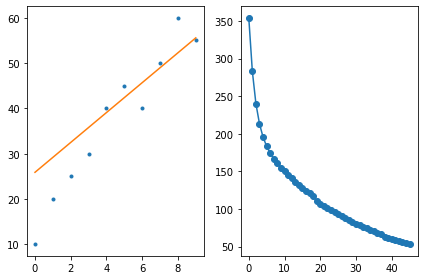

loss =  51.6132118105141
epoch=49, 기울기=3.3554, 절편=25.5274, w편미분=-1.0142, b편미분=6.3609
w =  3.3553763164556307


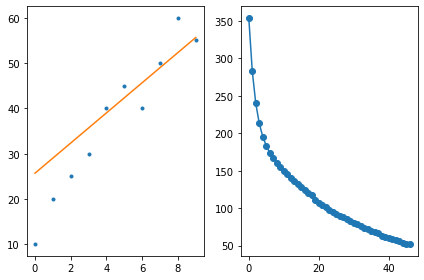

loss =  50.37905936129058
epoch=50, 기울기=3.3853, 절편=25.3398, w편미분=-0.9973, b편미분=6.2531
w =  3.3852963738841972


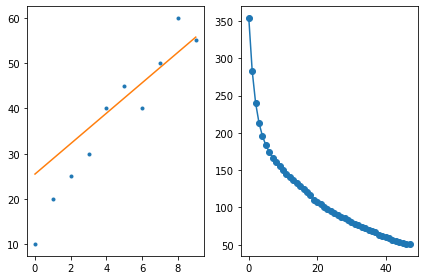

loss =  49.18637026186865
epoch=51, 기울기=3.4147, 절편=25.1553, w편미분=-0.9802, b편미분=6.1472
w =  3.414703253065469


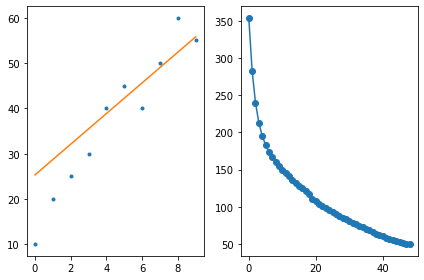

loss =  48.0337514838611
epoch=52, 기울기=3.4436, 절편=24.9741, w편미분=-0.9638, b편미분=6.0430
w =  3.4436166537915285


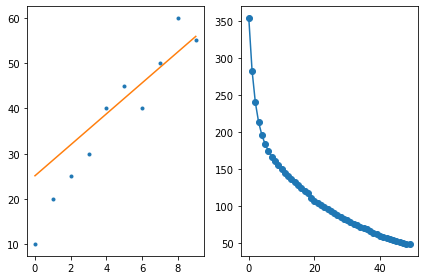

loss =  46.919856799932134
epoch=53, 기울기=3.4720, 절편=24.7958, w편미분=-0.9473, b편미분=5.9407
w =  3.472036648616418


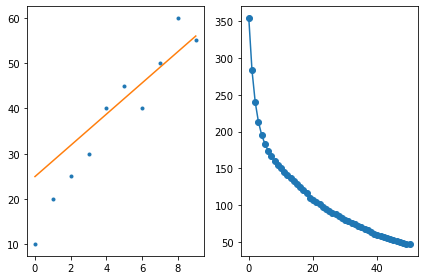

loss =  45.84338521143712
epoch=54, 기울기=3.5000, 절편=24.6206, w편미분=-0.9314, b편미분=5.8400
w =  3.499977837983645


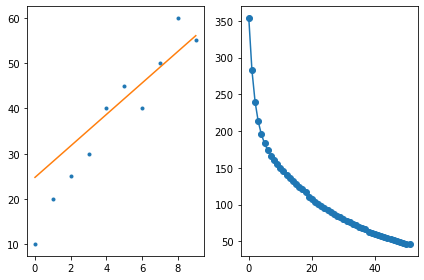

loss =  44.8030794288897
epoch=55, 기울기=3.5274, 절편=24.4484, w편미분=-0.9155, b편미분=5.7411
w =  3.5274436337069726


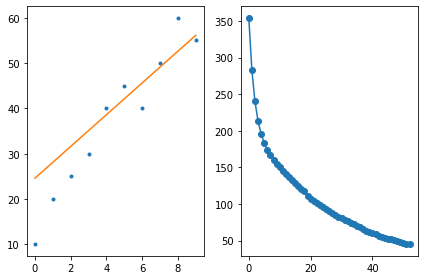

loss =  43.79772440348086
epoch=56, 기울기=3.5544, 절편=24.2791, w편미분=-0.9001, b편미분=5.6438
w =  3.554445629211896


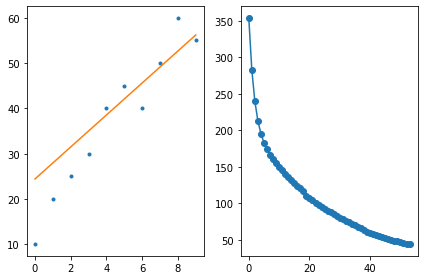

loss =  42.82614590793431
epoch=57, 기울기=3.5810, 절편=24.1126, w편미분=-0.8848, b편미분=5.5482
w =  3.580989016752008


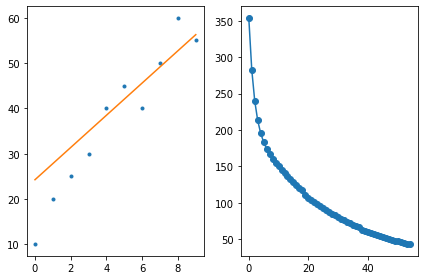

loss =  41.8872091650408
epoch=58, 기울기=3.6071, 절편=23.9490, w편미분=-0.8698, b편미분=5.4542
w =  3.6070835731585285


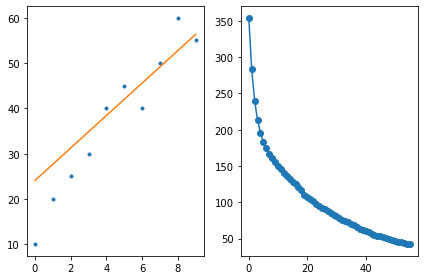

loss =  40.979817522269
epoch=59, 기울기=3.6327, 절편=23.7882, w편미분=-0.8551, b편미분=5.3618
w =  3.6327353909279734


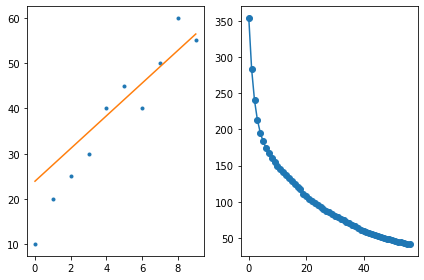

loss =  40.10291117090507
loss =  39.25546590822491
epoch=61, 기울기=3.6827, 절편=23.4746, w편미분=-0.8263, b편미분=5.1817
w =  3.6827432250021985


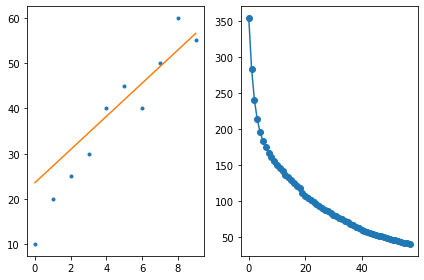

loss =  38.43649194125343
epoch=62, 기울기=3.7071, 절편=23.3218, w편미분=-0.8123, b편미분=5.0939
w =  3.7071136284340347


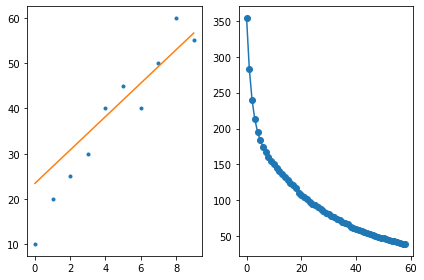

loss =  37.64503273071298
epoch=63, 기울기=3.7311, 절편=23.1715, w편미분=-0.7986, b편미분=5.0076
w =  3.7310709440089553


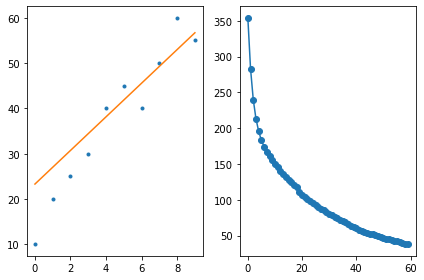

loss =  36.880163873811796
epoch=64, 기울기=3.7546, 절편=23.0239, w편미분=-0.7851, b편미분=4.9227
w =  3.7546225362517753


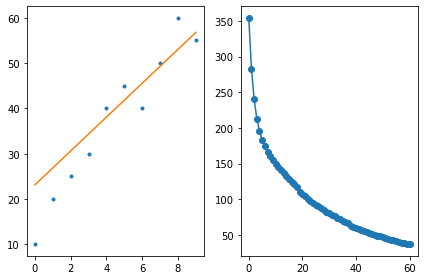

loss =  36.140992024566586
epoch=65, 기울기=3.7778, 절편=22.8787, w편미분=-0.7717, b편미분=4.8393
w =  3.7777750031877377


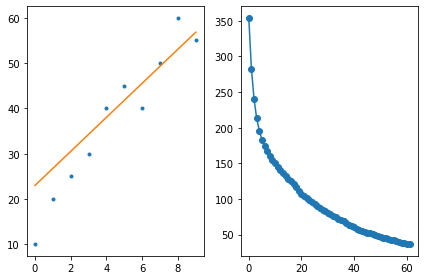

loss =  35.4266538503988
epoch=66, 기울기=3.8005, 절편=22.7360, w편미분=-0.7587, b편미분=4.7573
w =  3.8005353143203693


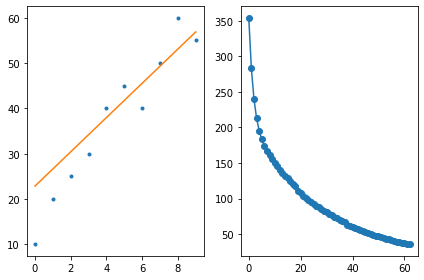

loss =  34.73631502378569
epoch=67, 기울기=3.8229, 절편=22.5957, w편미분=-0.7458, b편미분=4.6767
w =  3.822909957153567


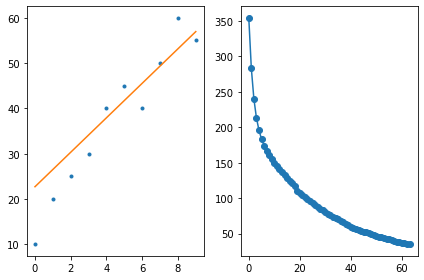

loss =  34.06916924778855
epoch=68, 기울기=3.8449, 절편=22.4577, w편미분=-0.7332, b편미분=4.5975
w =  3.8449055833366894


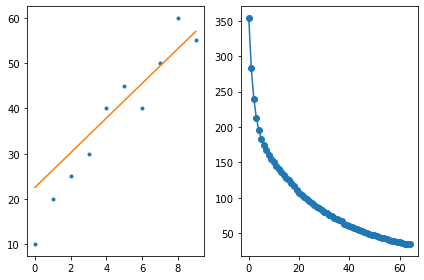

loss =  33.4244373143198
epoch=69, 기울기=3.8665, 절편=22.3221, w편미분=-0.7208, b편미분=4.5196
w =  3.8665285254482242


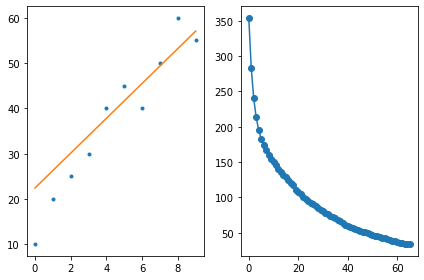

loss =  32.80136619404915
epoch=70, 기울기=3.8878, 절편=22.1889, w편미분=-0.7086, b편미분=4.4430
w =  3.887785164197243


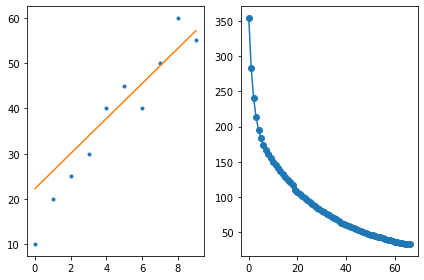

loss =  32.199228156885944
epoch=71, 기울기=3.9087, 절편=22.0578, w편미분=-0.6965, b편미분=4.3678
w =  3.908681655154686


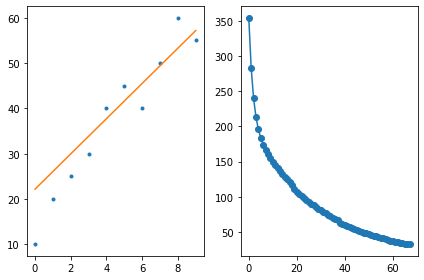

loss =  31.617319922010147
epoch=72, 기울기=3.9292, 절편=21.9290, w편미분=-0.6847, b편미분=4.2938
w =  3.9292241377407966


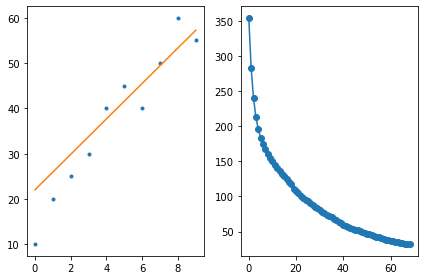

loss =  31.054961836459636
epoch=73, 기울기=3.9494, 절편=21.8024, w편미분=-0.6731, b편미분=4.2210
w =  3.949418580991397


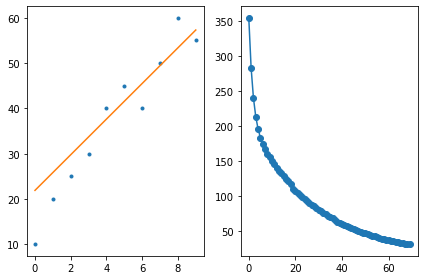

loss =  30.511497081313934
epoch=74, 기울기=3.9693, 절편=21.6779, w편미분=-0.6617, b편미분=4.1495
w =  3.9692709027975326


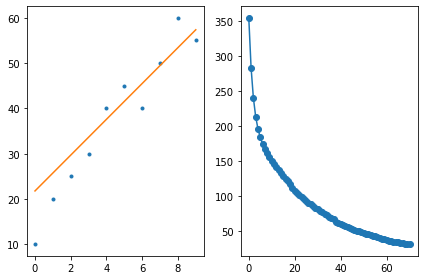

loss =  29.986290904547662
epoch=75, 기울기=3.9888, 절편=21.5555, w편미분=-0.6505, b편미분=4.0792
w =  3.9887868831513646


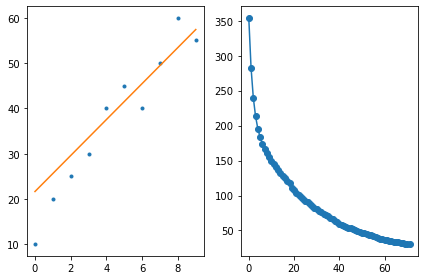

loss =  29.478729879657493
epoch=76, 기울기=4.0080, 절편=21.4352, w편미분=-0.6395, b편미분=4.0101
w =  4.007972232465827


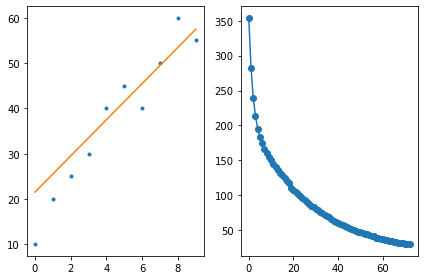

loss =  28.988221189196643
epoch=77, 기울기=4.0268, 절편=21.3169, w편미분=-0.6287, b편미분=3.9422
w =  4.026832543064096


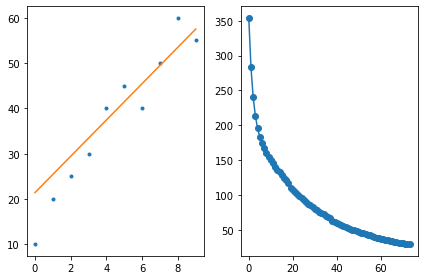

loss =  28.514191932380385
epoch=78, 기울기=4.0454, 절편=21.2007, w편미분=-0.6180, b편미분=3.8754
w =  4.045373328599193


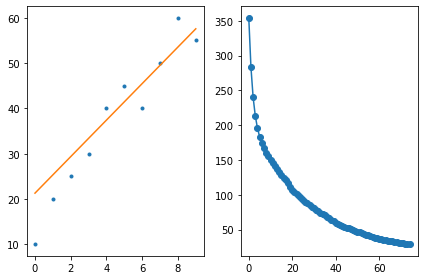

loss =  28.05608845595331
epoch=79, 기울기=4.0636, 절편=21.0864, w편미분=-0.6076, b편미분=3.8097
w =  4.063599997208164


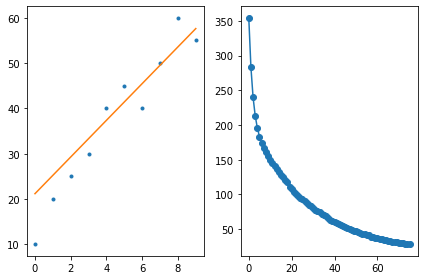

loss =  27.613375707537664
loss =  27.185536610706567
epoch=81, 기울기=4.0991, 절편=20.8636, w편미분=-0.5871, b편미분=3.6817
w =  4.099132189072772


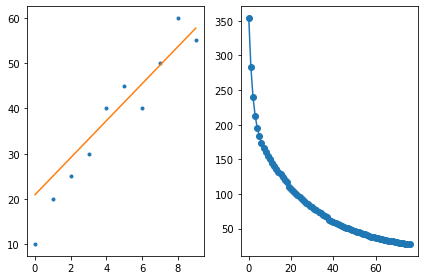

loss =  26.77207146105294
epoch=82, 기울기=4.1164, 절편=20.7550, w편미분=-0.5772, b편미분=3.6194
w =  4.11644808599379


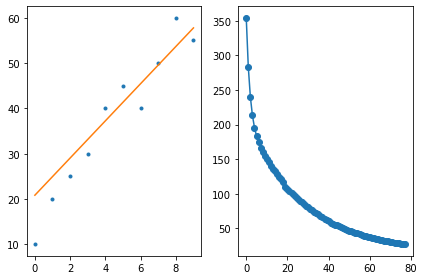

loss =  26.372497342548304
epoch=83, 기울기=4.1335, 절편=20.6483, w편미분=-0.5674, b편미분=3.5580
w =  4.133470619349144


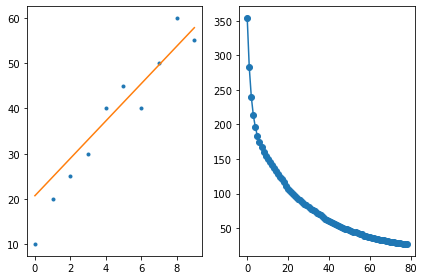

loss =  25.98634756351014
epoch=84, 기울기=4.1502, 절편=20.5433, w편미분=-0.5578, b편미분=3.4978
w =  4.150204760511505


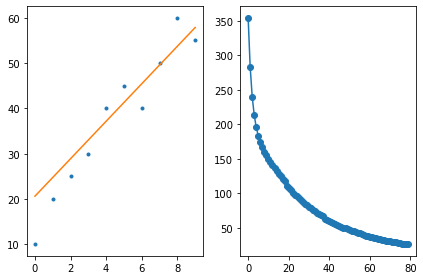

loss =  25.613171111518454
epoch=85, 기울기=4.1667, 절편=20.4402, w편미분=-0.5484, b편미분=3.4385
w =  4.166655394421818


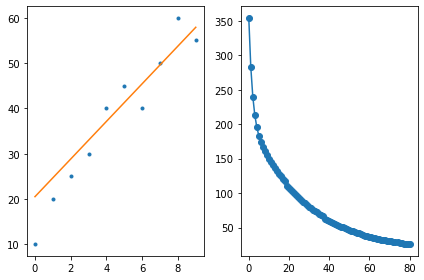

loss =  25.252532126645924
epoch=86, 기울기=4.1828, 절편=20.3388, w편미분=-0.5391, b편미분=3.3802
w =  4.182827324923686


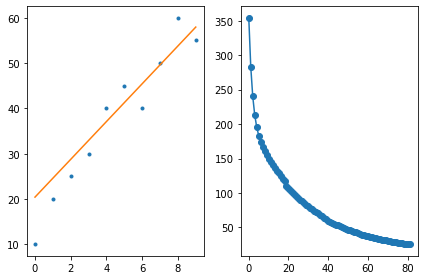

loss =  24.904009392385092
epoch=87, 기울기=4.1987, 절편=20.2391, w편미분=-0.5299, b편미분=3.3230
w =  4.19872527322292


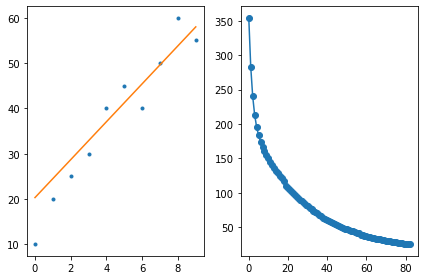

loss =  24.567195843679123
epoch=88, 기울기=4.2144, 절편=20.1411, w편미분=-0.5210, b편미분=3.2667
w =  4.2143538814822765


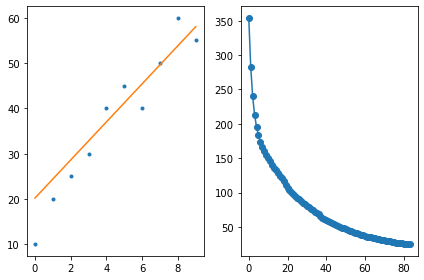

loss =  24.24169809148079
epoch=89, 기울기=4.2297, 절편=20.0447, w편미분=-0.5121, b편미분=3.2113
w =  4.229717712507852


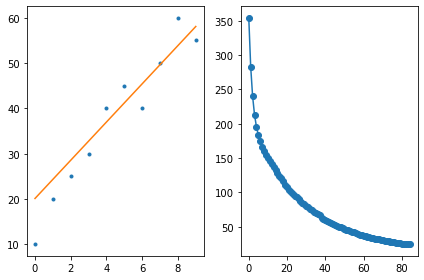

loss =  23.927135963284876
epoch=90, 기울기=4.2448, 절편=19.9500, w편미분=-0.5035, b편미분=3.1569
w =  4.244821252338135


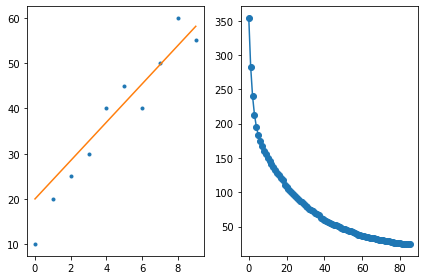

loss =  23.623142059097045
epoch=91, 기울기=4.2597, 절편=19.8569, w편미분=-0.4949, b편미분=3.1035
w =  4.259668910607333


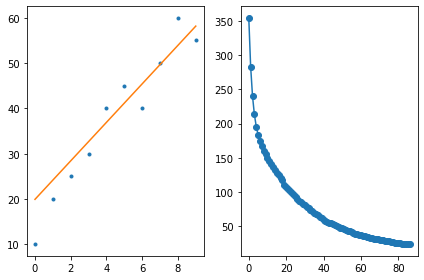

loss =  23.32936132232058
epoch=92, 기울기=4.2743, 절편=19.7654, w편미분=-0.4865, b편미분=3.0509
w =  4.274265022545608


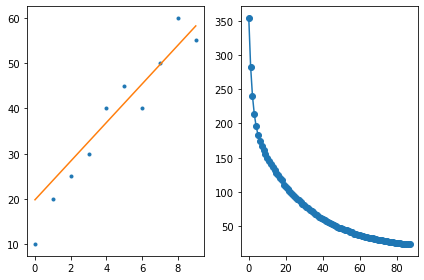

loss =  23.04545062506005
epoch=93, 기울기=4.2886, 절편=19.6754, w편미분=-0.4783, b편미분=2.9992
w =  4.288613849708098


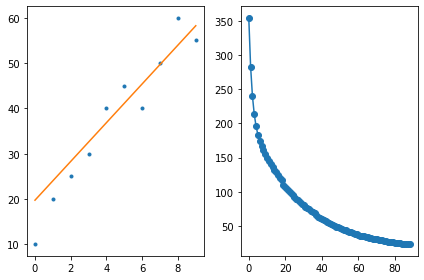

loss =  22.7710783673572
epoch=94, 기울기=4.3027, 절편=19.5870, w편미분=-0.4702, b편미분=2.9484
w =  4.302719581623376


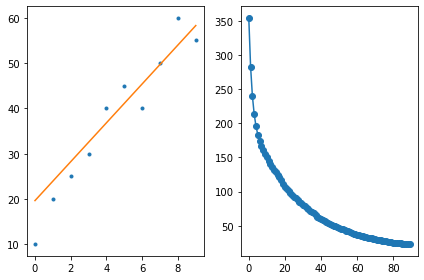

loss =  22.505924089891316
epoch=95, 기울기=4.3166, 절편=19.5000, w편미분=-0.4622, b편미분=2.8984
w =  4.316586336712281


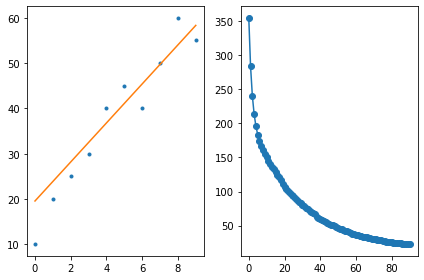

loss =  22.24967809969136
epoch=96, 기울기=4.3302, 절편=19.4145, w편미분=-0.4544, b편미분=2.8493
w =  4.33021816371961


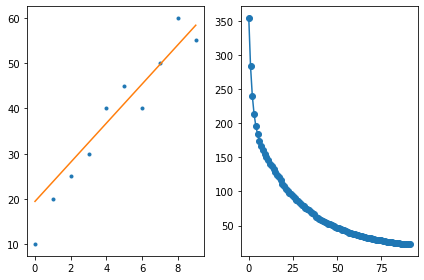

loss =  22.002041108423132
epoch=97, 기울기=4.3436, 절편=19.3305, w편미분=-0.4467, b편미분=2.8010
w =  4.3436190427236125


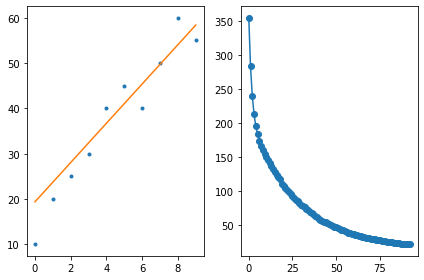

loss =  21.762723882828595
epoch=98, 기울기=4.3568, 절편=19.2479, w편미분=-0.4391, b편미분=2.7536
w =  4.356792886428058


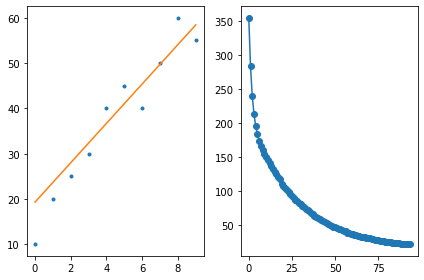

loss =  21.531446906909313
epoch=99, 기울기=4.3697, 절편=19.1667, w편미분=-0.4317, b편미분=2.7069
w =  4.369743541206743


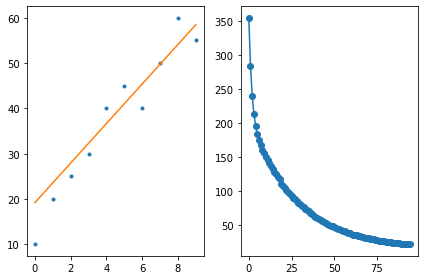

loss =  21.307940055459348


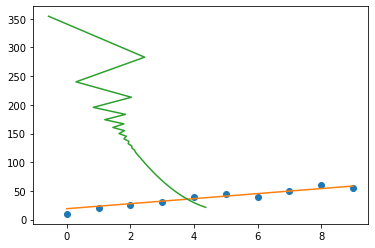

In [21]:

weights = []
losses = []

for i in range(epochs):
    y_hat = w * x + b
    error = y - y_hat
    
    loss = np.sum((y - y_hat)**2)/len(x)
    print('loss = ', loss)
    
    # w_diff : 기울기, b_diff : 절편
    w_diff = -(2/len(x)) * sum(x * (error))
    b_diff = -(2/len(x)) * sum(error)
    
    # w_diff, b_diff update
    w = w - lr * w_diff
    b = b - lr * b_diff
    
    if i % 20:
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f, w편미분=%.04f, b편미분=%.04f" %(i, w, b, w_diff, b_diff))
        print('w = ', w)
        
        weights.append(w)
        losses.append(loss)
        
        plt.subplot(1,2,1)
        plt.plot(x, y, '.')
        plt.plot(x, y_hat, '-')
        
        plt.subplot(1,2,2)
        plt.plot(losses, 'o-')
        
        plt.tight_layout()
        plt.show()
        
y_hat = w * x + b
plt.scatter(x,y)

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.plot(weights, losses)
plt.show()

In [40]:
# Tensorflow/ Kerad 2 impletation
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [42]:
tf.__version__

'2.8.0'

In [48]:
x = np.array([0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])

In [49]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

In [50]:
sdg = tf.keras.optimizers.SGD(learning_rate = 0.003)

In [51]:
model.compile(loss='mean_squared_error', optimizer=sdg)

In [52]:
hist = model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 190ms/step - loss: 1006.3351
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 706.0438
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 501.7526
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 362.7530
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 268.1600
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 203.7687
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 159.9187
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 130.0392
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 109.6617
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 95.7468
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 86.2274
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 79.6978
Epoch 13/100
1/1 [===================

In [53]:
print(hist.history)

{'loss': [1006.3350830078125, 706.0438232421875, 501.7525939941406, 362.75299072265625, 268.15997314453125, 203.76870727539062, 159.9186553955078, 130.03921508789062, 109.66169738769531, 95.74678802490234, 86.2274398803711, 79.69779205322266, 75.20167541503906, 72.08880615234375, 69.9168930053711, 68.3851318359375, 67.28892517089844, 66.48915100097656, 65.8911361694336, 65.43057250976562, 65.06363677978516, 64.76057434082031, 64.50112915039062, 64.27154541015625, 64.06243133544922, 63.86742401123047, 63.68217849731445, 63.5037956237793, 63.3302116394043, 63.16008377075195, 62.99248123168945, 62.8267707824707, 62.66253662109375, 62.49944305419922, 62.33733367919922, 62.176048278808594, 62.015533447265625, 61.855674743652344, 61.696434020996094, 61.537818908691406, 61.3797492980957, 61.222267150878906, 61.065338134765625, 60.90894317626953, 60.753082275390625, 60.5977668762207, 60.442970275878906, 60.288719177246094, 60.134979248046875, 59.98175048828125, 59.82905197143555, 59.6768722534

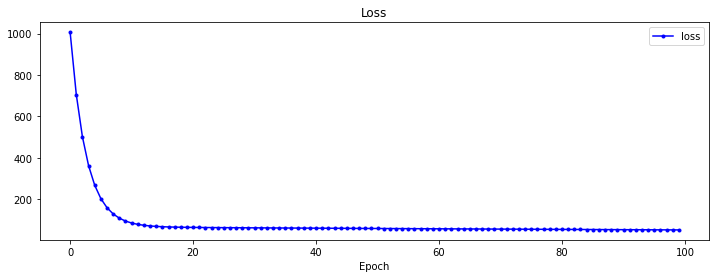

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.title('Loss')
plt.plot(hist.history['loss'], marker='.', c='blue', label='loss')
plt.xlabel('Epoch')
plt.legend()

In [63]:
# Prediction
temp_x = 18

pred = model.predict(np.array([temp_x]))[0][0]
pred2 = model.predict(np.array([temp_x]))

print(pred2)
print()

print(f'x가 {temp_x} 일때 : y의 예측값 : {pred}')
print('x가 %s 일때 : y의 예측값 : %s' % (temp_x, pred))

[[128.04832]]

x가 18 일때 : y의 예측값 : 128.04832458496094
x가 18 일때 : y의 예측값 : 128.04832


In [ ]:
################################################

In [3]:
def plot_prediction(pred, y):
    plt.figure(figsize=(8, 6))

    # plt.scatter(x, y, label='y : Hypothesis')
    # plt.scatter(x, pred, label='y_hat : predict')
    plt.plot(x, y, '.', label='actual')
    plt.plot(x, pred,'-', label='y_hat')
    plt.xlabel('epoch')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    

weight  -17.507484381956246   bias  3.9638752923512417
epoch  0
error  130.82688282664859


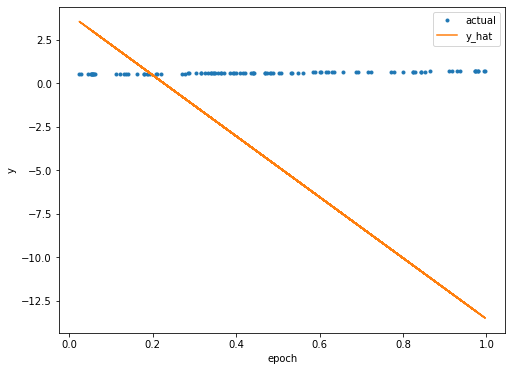

weight  -11.771083906864114   bias  6.457414504104316
epoch  10
error  12.230083291740593


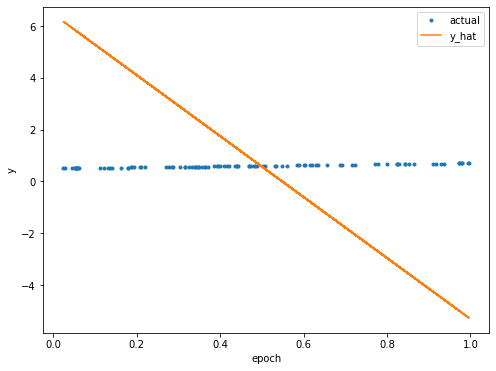

weight  -9.000709845672473   bias  5.08336696439219
epoch  20
error  7.227276132788362


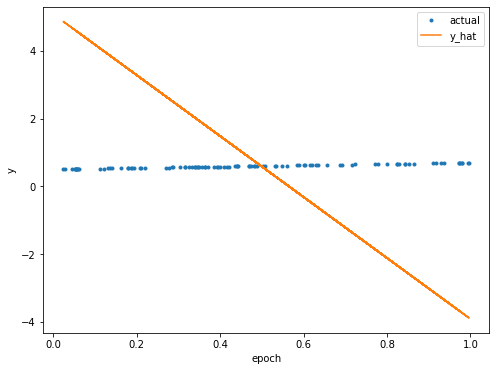

weight  -6.8728802290970785   bias  4.023386142487414
epoch  30
error  4.270953485215981


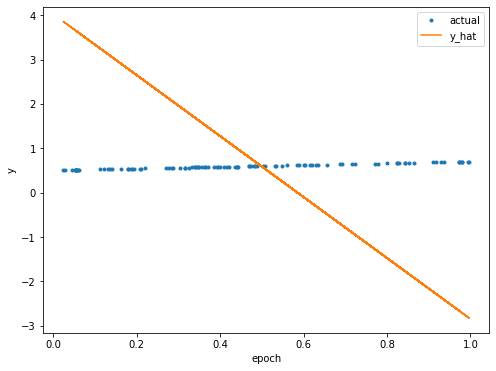

weight  -5.237151075875233   bias  3.2085405346017306
epoch  40
error  2.5239168032573915


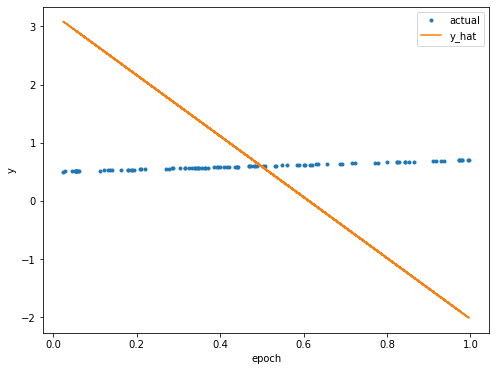

weight  -3.979713338422016   bias  2.5821424386014797
epoch  50
error  1.491506768176117


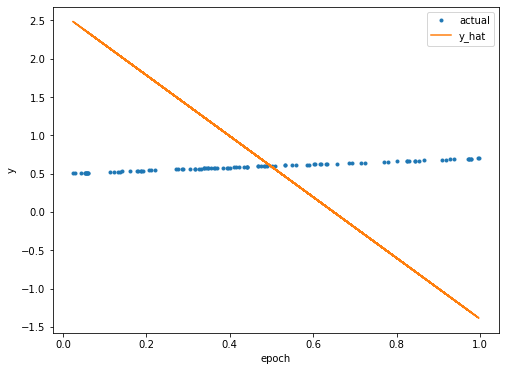

weight  -3.0130804069264787   bias  2.1006100256689613
epoch  60
error  0.8814048215234688


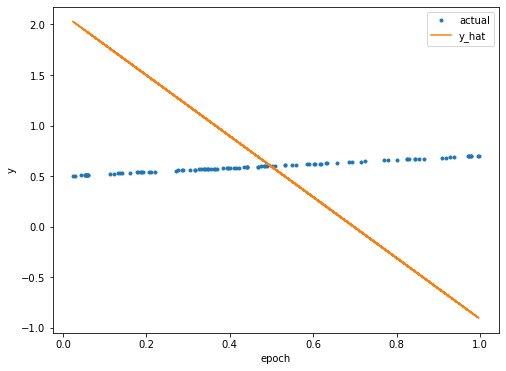

weight  -2.2699985059914307   bias  1.7304405341225264
epoch  70
error  0.5208655273853138


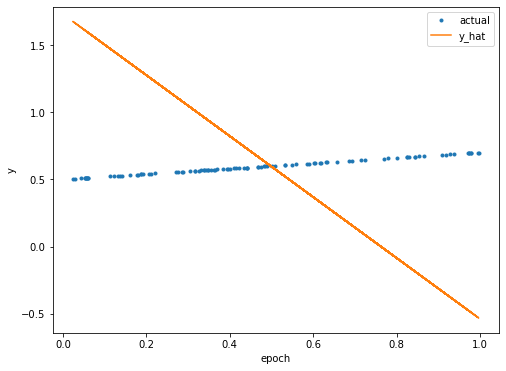

weight  -1.6987674900535101   bias  1.445879310845233
epoch  80
error  0.30780509817208573


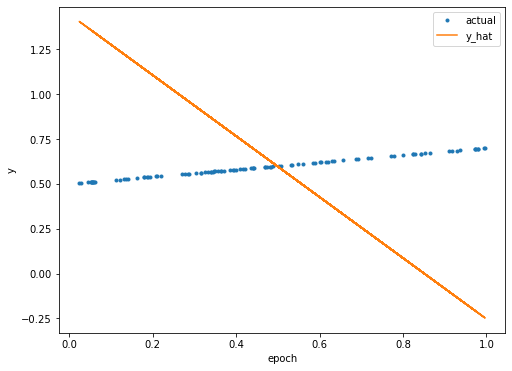

weight  -1.2596437902851978   bias  1.2271279235961523
epoch  90
error  0.18189719510970812


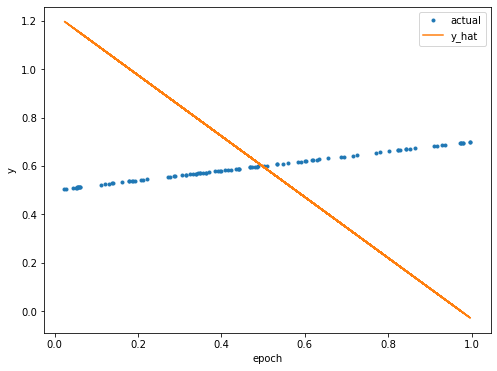

weight  -0.9220752439036626   bias  1.058966679164168
epoch  100
error  0.10749201291747726


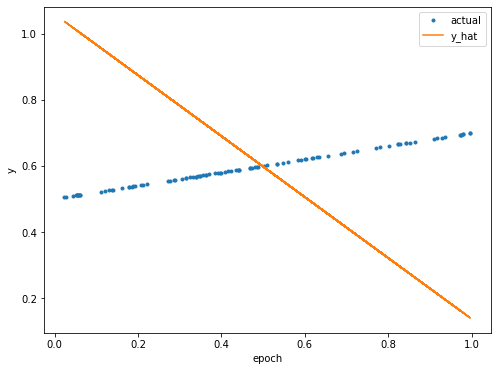

weight  -0.6625754183049412   bias  0.9296957086595806
epoch  110
error  0.06352232553163993


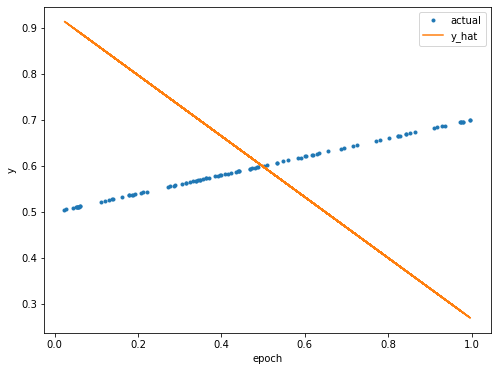

weight  -0.4630895354891408   bias  0.8303209456358865
epoch  120
error  0.03753847129130804


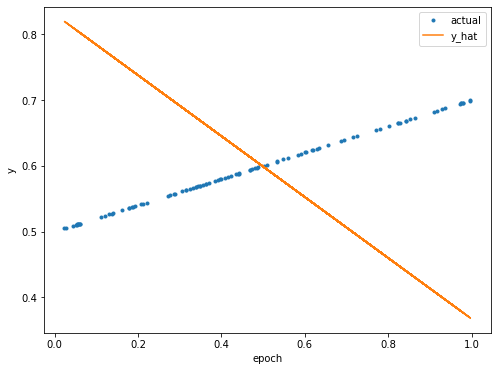

weight  -0.30973830547970055   bias  0.7539283612260331
epoch  130
error  0.0221833318458481


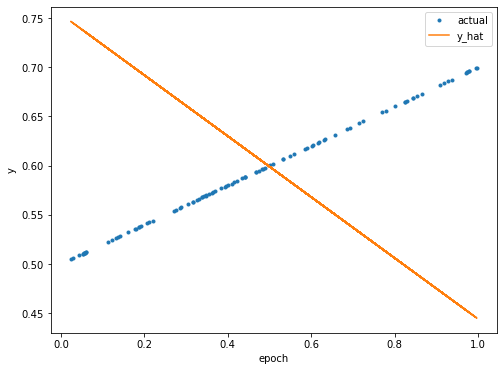

weight  -0.19185227057104065   bias  0.6952029185155421
epoch  140
error  0.013109223547336173


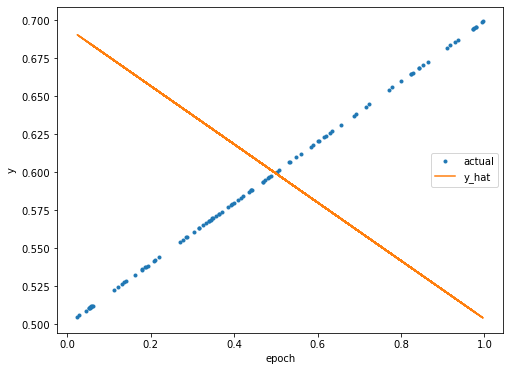

weight  -0.10122947461674504   bias  0.6500587772590991
epoch  150
error  0.0077468859596128556


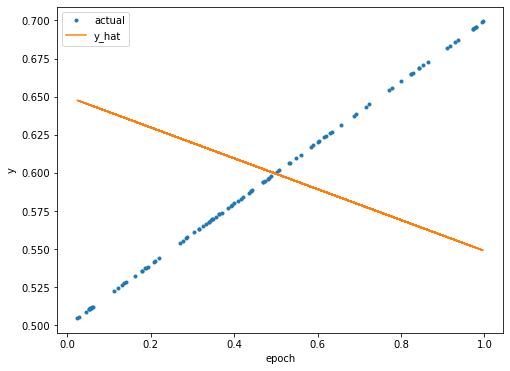

weight  -0.03156480947691663   bias  0.6153550203231365
epoch  160
error  0.004578016528175062


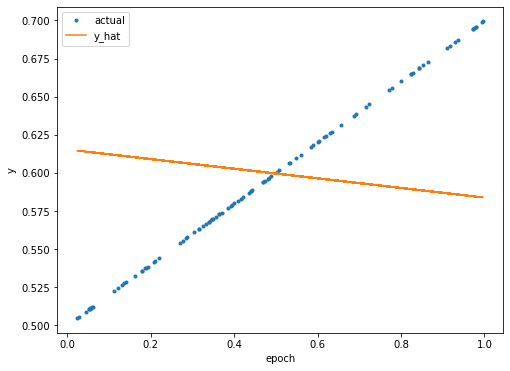

weight  0.02198866476693745   bias  0.5886771234366056
epoch  170
error  0.0027053754813878067


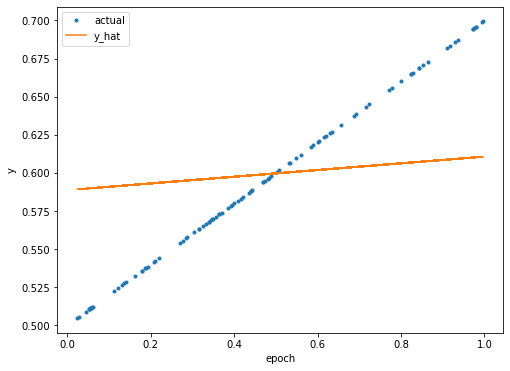

weight  0.06315694710678146   bias  0.5681689639424717
epoch  180
error  0.0015987396398090112


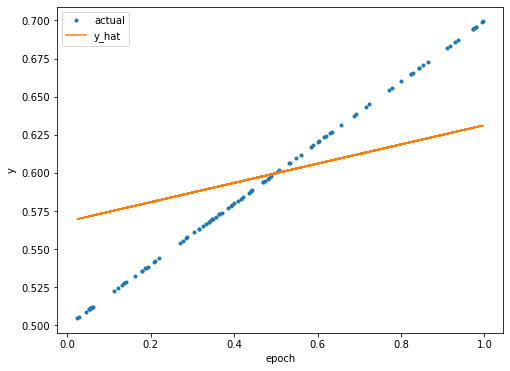

weight  0.09480433310261374   bias  0.5524036805085599
epoch  190
error  0.0009447740077046474


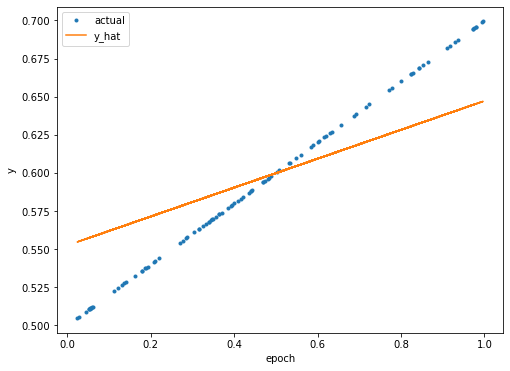

weight  0.11913269910295717   bias  0.5402843988234985
epoch  200
error  0.0005583135010907307


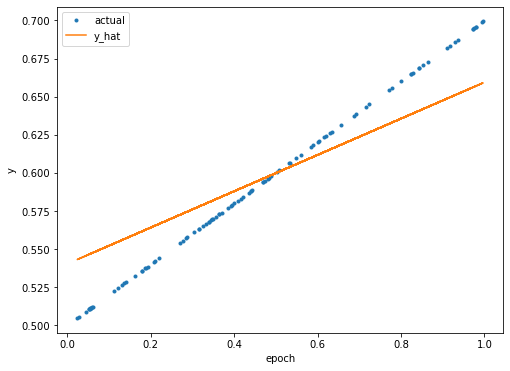

weight  0.13783469845053717   bias  0.5309679162383568
epoch  210
error  0.00032993495053648426


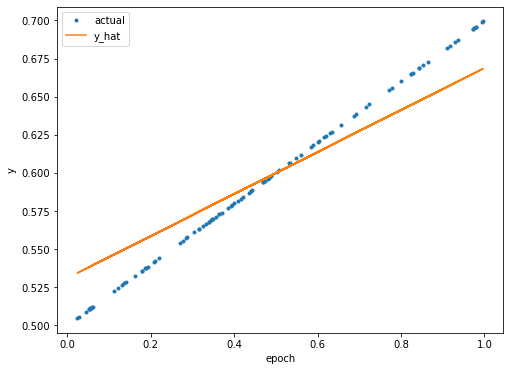

weight  0.15221152834498816   bias  0.5238060356900863
epoch  220
error  0.00019497481499703518


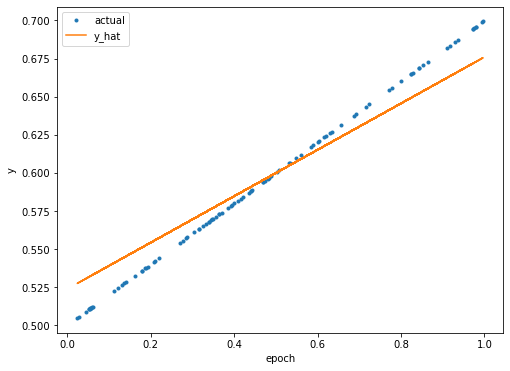

weight  0.16326346102729394   bias  0.518300467196941
epoch  230
error  0.00011522022271758152


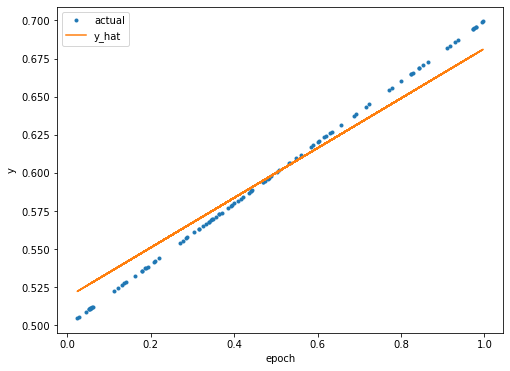

In [8]:

# w = np.random.uniform(-20, 20)
# b = np.random.uniform(-5, 5)
b = 0
w = -20

errors = [] # cost
w_grads = []
learning_rate = 0.4

for epoch in range(500):
    y_hat = w * x + b  # hypothesis : predtec value
    error = np.sum((y - y_hat)**2)/len(x)  # cost : mean square error
    # error = np.abs(y_hat - y).mean() # mean absolute  error
    if error < 0.0001:
        break
    errors.append(error)
    
    # gradient descent
    w_grad = learning_rate * ((y_hat - y)*x).mean()  # weight 계산  
    b_grad = learning_rate * (y_hat - y).mean()
    # print('w_grad', w_grad)
    w_grads.append(w_grad)
    
    # w, b update
    w = w - w_grad
    b = b - b_grad
    
    if epoch % 10 == 0:
        print('weight ', w, '  bias ', b)
        print('epoch ', epoch)
        print('error ', error)
        y_hat = w * x + b
        plot_prediction(y_hat, y)

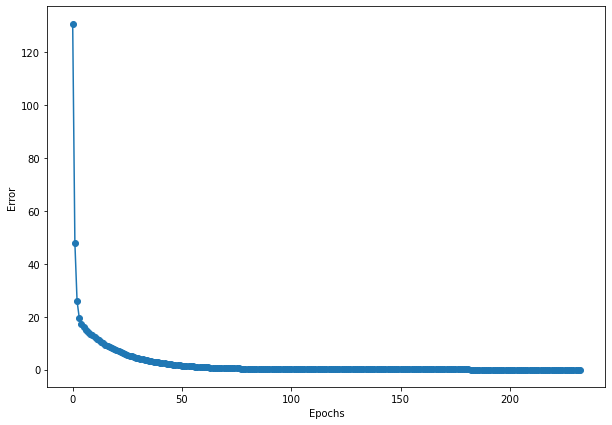

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

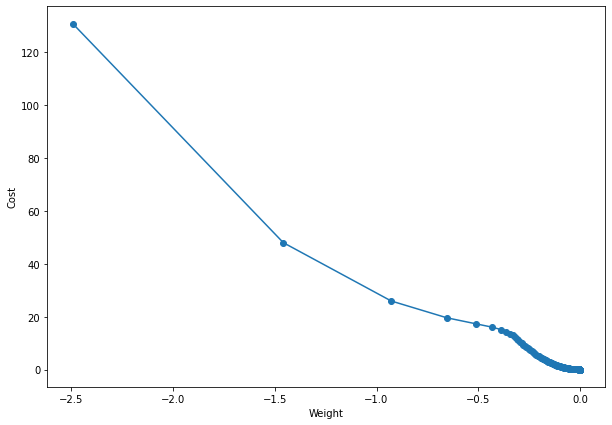

In [7]:
plt.figure(figsize=(10, 7))
plt.plot(w_grads, errors, marker='o')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

아이디어가 있습니까? 좋습니다! 넘어가기 전에 커널을 종료해 주십시오.

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}